In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Specify the path to your CSV file
csv_file_path = 'Unique.csv'

# Read the CSV file and convert it into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())

  country      state    city                       station       last_update  \
0   India  Rajasthan  Jaipur  Adarsh Nagar, Jaipur - RSPCB  23-02-2020 12:00   
1   India  Rajasthan  Jaipur  Adarsh Nagar, Jaipur - RSPCB  23-02-2020 01:00   
2   India  Rajasthan  Jaipur  Adarsh Nagar, Jaipur - RSPCB  23-02-2020 02:00   
3   India  Rajasthan  Jaipur  Adarsh Nagar, Jaipur - RSPCB  23-02-2020 03:00   
4   India  Rajasthan  Jaipur  Adarsh Nagar, Jaipur - RSPCB  23-02-2020 04:00   

  pollutant_id  pollutant_min  pollutant_max  pollutant_avg        time_stamp  \
0           CO           20.0           59.0           37.0  23-02-2020 00:00   
1           CO           20.0           59.0           38.0  23-02-2020 01:00   
2           CO           22.0           59.0           39.0  23-02-2020 02:00   
3           CO           25.0           59.0           39.0  23-02-2020 03:00   
4           CO           25.0           59.0           37.0  23-02-2020 04:00   

        date_     time_  dayofwe

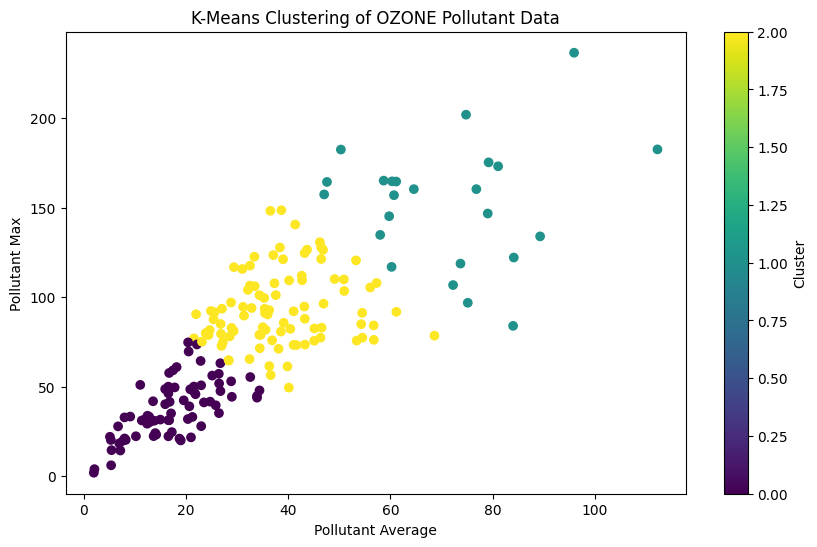

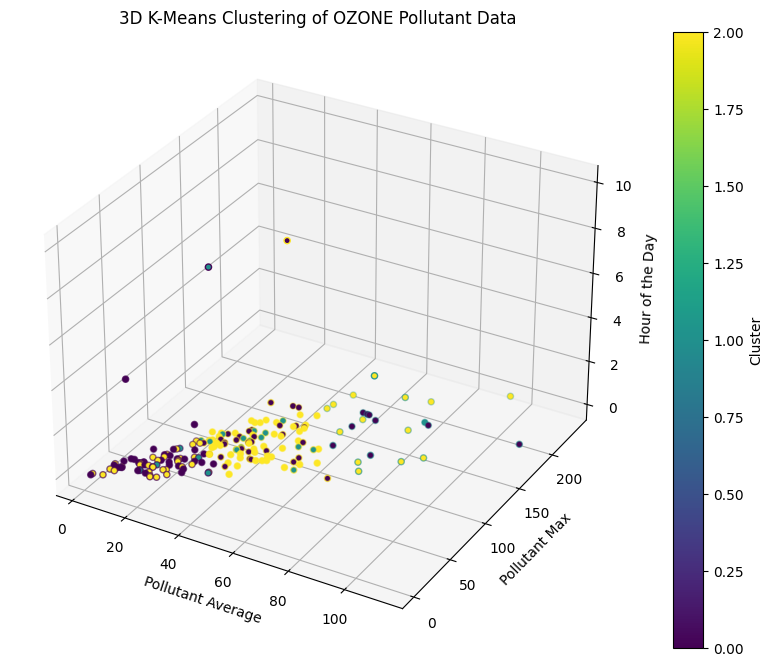

All Stations with Clusters (OZONE only):
                                            station  pollutant_avg  \
0                      Adarsh Nagar, Jaipur - RSPCB      61.170124   
1                 Alandur Bus Depot, Chennai - CPCB      21.593361   
2                              Alipur, Delhi - DPCC      24.900415   
3    Anand Kala Kshetram, Rajamahendravaram - APPCB      57.298755   
4                         Anand Vihar, Delhi - DPCC      16.582394   
..                                              ...            ...   
187              Ward-32 Bapupara, Siliguri - WBPCB      21.883333   
188                          Wazirpur, Delhi - DPCC      12.432659   
189                            Worli, Mumbai - MPCB      40.147273   
190                Yamunapuram, Bulandshahr - UPPCB      74.792531   
191                     Zoo Park, Hyderabad - TSPCB      23.000000   

     pollutant_max  cluster  
0        91.825726        2  
1        77.004149        2  
2        92.331950        2 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Filter dataset for only OZONE pollutants
df_ozone = df[df['pollutant_id'] == 'OZONE'].copy()

# Step 2: Preprocessing
# Group by 'station' and aggregate pollution data by taking the mean
df_grouped = df_ozone.groupby('station').agg({
    'pollutant_min': 'mean',
    'pollutant_max': 'mean',
    'pollutant_avg': 'mean',
    'dayofweek': 'first',
    'state': 'first',
    'country': 'first',
    'time_': 'first'
}).reset_index()

# Extract the hour from the 'time_' column
df_grouped['hour'] = pd.to_datetime(df_grouped['time_'], format='%H:%M:%S').dt.hour

# Convert categorical variables ('country' and 'state') into numerical using LabelEncoder
le = LabelEncoder()
df_grouped['country'] = le.fit_transform(df_grouped['country'])
df_grouped['state'] = le.fit_transform(df_grouped['state'])

# Step 3: Select features for clustering (focusing on pollution levels)
features = ['pollutant_avg', 'pollutant_max']
X = df_grouped[features]

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_grouped['cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Identify the highest polluted cluster
# Find the cluster with the highest pollution based on 'pollutant_avg'
most_polluted_cluster = df_grouped.groupby('cluster')['pollutant_avg'].mean().idxmax()

# Filter cities that belong to the most polluted cluster
most_polluted_cities = df_grouped[df_grouped['cluster'] == most_polluted_cluster]

# Step 6: Visualize the results with 2D and 3D scatter plots

# 2D Scatter Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_grouped['pollutant_avg'], df_grouped['pollutant_max'], c=df_grouped['cluster'], cmap='viridis')
plt.xlabel('Pollutant Average')
plt.ylabel('Pollutant Max')
plt.title('K-Means Clustering of OZONE Pollutant Data')
plt.colorbar(scatter, label='Cluster')
plt.show()

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points in 3D
sc = ax.scatter(df_grouped['pollutant_avg'], df_grouped['pollutant_max'], df_grouped['hour'], c=df_grouped['cluster'], cmap='viridis')

# Labels and title for 3D plot
ax.set_xlabel('Pollutant Average')
ax.set_ylabel('Pollutant Max')
ax.set_zlabel('Hour of the Day')
ax.set_title('3D K-Means Clustering of OZONE Pollutant Data')

# Show color bar
plt.colorbar(sc, label='Cluster')
plt.show()

# Print resulting dataframe with cluster labels and highlight most polluted cities
print("All Stations with Clusters (OZONE only):")
print(df_grouped[['station', 'pollutant_avg', 'pollutant_max', 'cluster']])

print("\nMost Polluted Stations (OZONE Cluster with Highest Pollution Levels):")
print(most_polluted_cities[['station', 'pollutant_avg', 'pollutant_max', 'cluster']])


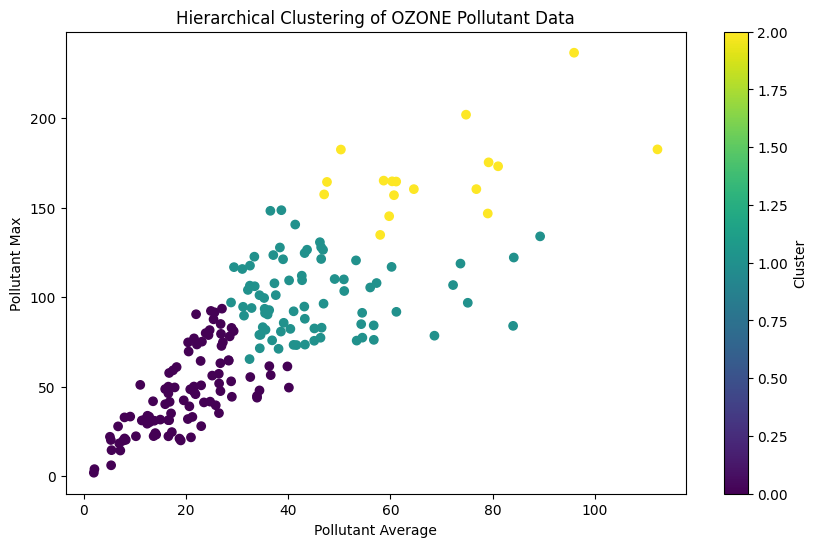

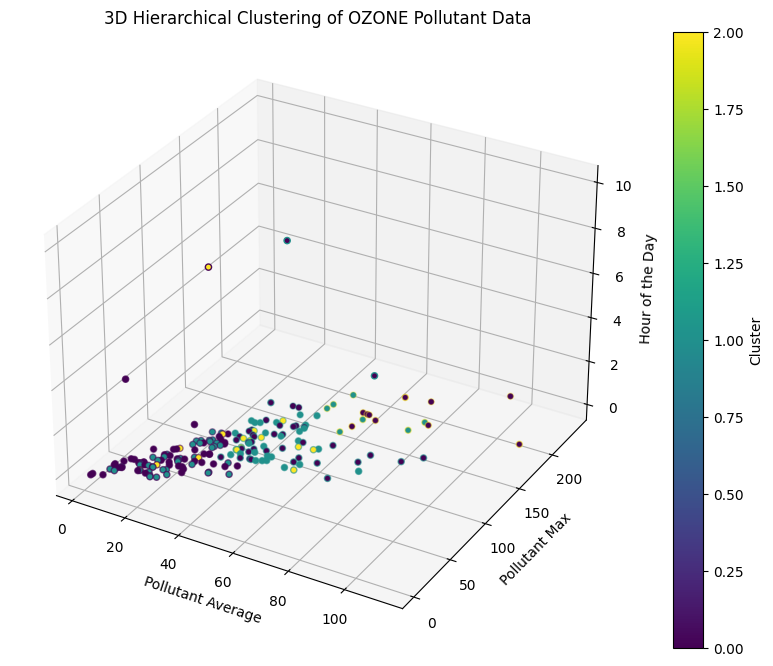

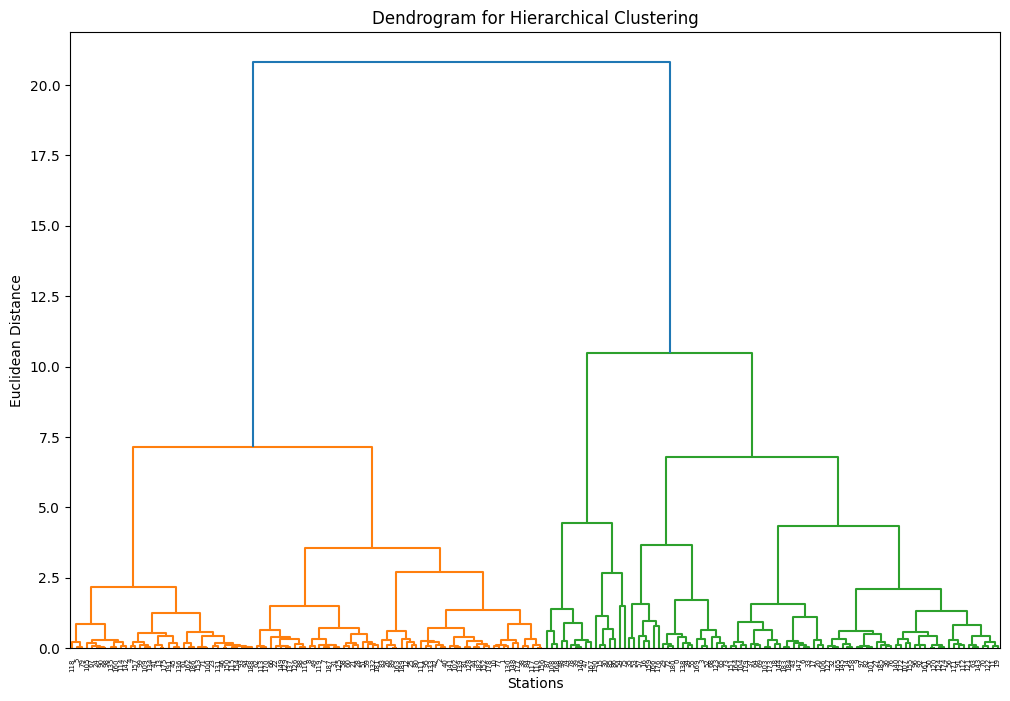

All Stations with Clusters (OZONE only):
                                            station  pollutant_avg  \
0                      Adarsh Nagar, Jaipur - RSPCB      61.170124   
1                 Alandur Bus Depot, Chennai - CPCB      21.593361   
2                              Alipur, Delhi - DPCC      24.900415   
3    Anand Kala Kshetram, Rajamahendravaram - APPCB      57.298755   
4                         Anand Vihar, Delhi - DPCC      16.582394   
..                                              ...            ...   
187              Ward-32 Bapupara, Siliguri - WBPCB      21.883333   
188                          Wazirpur, Delhi - DPCC      12.432659   
189                            Worli, Mumbai - MPCB      40.147273   
190                Yamunapuram, Bulandshahr - UPPCB      74.792531   
191                     Zoo Park, Hyderabad - TSPCB      23.000000   

     pollutant_max  cluster  
0        91.825726        1  
1        77.004149        0  
2        92.331950        0 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D
# Step 1: Filter dataset for only OZONE pollutants
df_ozone = df[df['pollutant_id'] == 'OZONE'].copy()

# Step 2: Preprocessing
# Group by 'station' and aggregate pollution data by taking the mean
df_grouped = df_ozone.groupby('station').agg({
    'pollutant_min': 'mean',
    'pollutant_max': 'mean',
    'pollutant_avg': 'mean',
    'dayofweek': 'first',
    'state': 'first',
    'country': 'first',
    'time_': 'first'
}).reset_index()



# Extract the hour from the 'time_' column
df_grouped['hour'] = pd.to_datetime(df_grouped['time_'], format='%H:%M:%S').dt.hour

# Convert categorical variables ('country' and 'state') into numerical using LabelEncoder
le = LabelEncoder()
df_grouped['country'] = le.fit_transform(df_grouped['country'])
df_grouped['state'] = le.fit_transform(df_grouped['state'])

# Step 3: Select features for clustering (focusing on pollution levels)
features = ['pollutant_avg', 'pollutant_max']
X = df_grouped[features]

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply Agglomerative Hierarchical Clustering
# Number of clusters (we'll set to 3 for consistency with the original code)
hierarchical = AgglomerativeClustering(n_clusters=3)
df_grouped['cluster'] = hierarchical.fit_predict(X_scaled)

# Step 5: Identify the highest polluted cluster
# Find the cluster with the highest pollution based on 'pollutant_avg'
most_polluted_cluster = df_grouped.groupby('cluster')['pollutant_avg'].mean().idxmax()

# Filter cities that belong to the most polluted cluster
most_polluted_cities = df_grouped[df_grouped['cluster'] == most_polluted_cluster]

# Step 6: Visualize the results with 2D and 3D scatter plots

# 2D Scatter Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_grouped['pollutant_avg'], df_grouped['pollutant_max'], c=df_grouped['cluster'], cmap='viridis')
plt.xlabel('Pollutant Average')
plt.ylabel('Pollutant Max')
plt.title('Hierarchical Clustering of OZONE Pollutant Data')
plt.colorbar(scatter, label='Cluster')
plt.show()

# 3D Scatter Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points in 3D
sc = ax.scatter(df_grouped['pollutant_avg'], df_grouped['pollutant_max'], df_grouped['hour'], c=df_grouped['cluster'], cmap='viridis')

# Labels and title for 3D plot
ax.set_xlabel('Pollutant Average')
ax.set_ylabel('Pollutant Max')
ax.set_zlabel('Hour of the Day')
ax.set_title('3D Hierarchical Clustering of OZONE Pollutant Data')

# Show color bar
plt.colorbar(sc, label='Cluster')
plt.show()

# Optional: Dendrogram for visualizing hierarchical clustering
# Linkage matrix
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Stations')
plt.ylabel('Euclidean Distance')
plt.show()

# Print resulting dataframe with cluster labels and highlight most polluted cities
print("All Stations with Clusters (OZONE only):")
print(df_grouped[['station', 'pollutant_avg', 'pollutant_max', 'cluster']])

print("\nMost Polluted Stations (OZONE Cluster with Highest Pollution Levels):")
print(most_polluted_cities[['station', 'pollutant_avg', 'pollutant_max', 'cluster']])

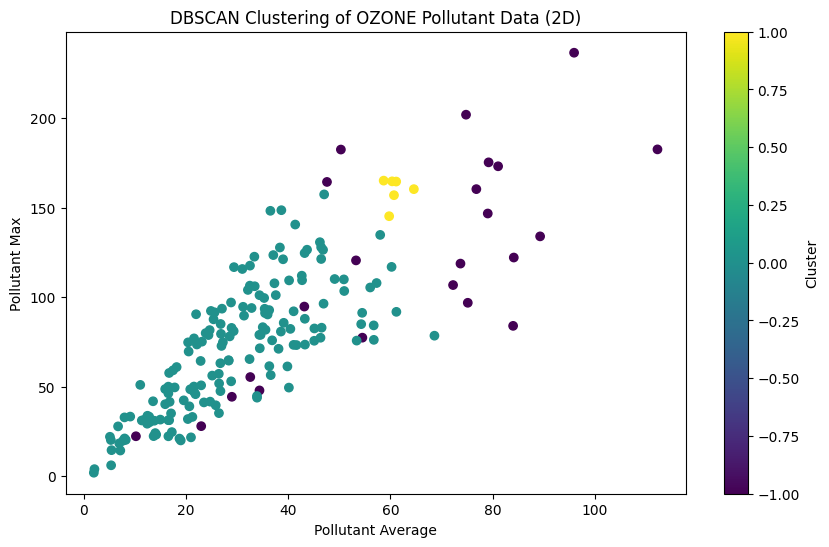

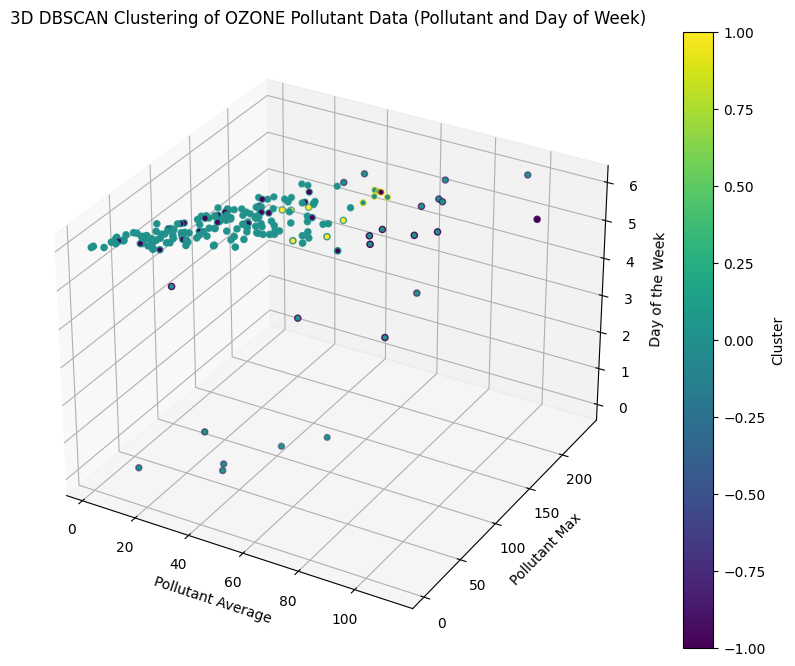

All Stations with Clusters (OZONE only - All Samples):
                                            station  pollutant_avg  \
0                      Adarsh Nagar, Jaipur - RSPCB      61.170124   
1                 Alandur Bus Depot, Chennai - CPCB      21.593361   
2                              Alipur, Delhi - DPCC      24.900415   
3    Anand Kala Kshetram, Rajamahendravaram - APPCB      57.298755   
4                         Anand Vihar, Delhi - DPCC      16.582394   
..                                              ...            ...   
187              Ward-32 Bapupara, Siliguri - WBPCB      21.883333   
188                          Wazirpur, Delhi - DPCC      12.432659   
189                            Worli, Mumbai - MPCB      40.147273   
190                Yamunapuram, Bulandshahr - UPPCB      74.792531   
191                     Zoo Park, Hyderabad - TSPCB      23.000000   

     pollutant_max  hour  dayofweek  cluster  
0        91.825726     0          6        0  
1        7

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Filter dataset for only OZONE pollutants
df_ozone = df[df['pollutant_id'] == 'OZONE'].copy()

# Step 2: Preprocessing
# Group by 'station' and aggregate pollution data by taking the mean
df_ozone = df_ozone.groupby('station').agg({
    'pollutant_min': 'mean',
    'pollutant_max': 'mean',
    'pollutant_avg': 'mean',
    'dayofweek': 'first',
    'state': 'first',
    'country': 'first',
    'time_': 'first'
}).reset_index()

# Step 2: Preprocessing
# Extract the hour from the 'time_' column
df_ozone['hour'] = pd.to_datetime(df_ozone['time_'], format='%H:%M:%S').dt.hour

# Convert categorical variables ('country' and 'state') into numerical using LabelEncoder
le_country = LabelEncoder()
le_state = LabelEncoder()
df_ozone['country'] = le_country.fit_transform(df_ozone['country'])
df_ozone['state'] = le_state.fit_transform(df_ozone['state'])

# Step 3: Select features for clustering (including pollution levels, hour, and day of the week)
features = ['pollutant_avg', 'pollutant_max', 'hour', 'dayofweek']
X = df_ozone[features]

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply DBSCAN clustering
# Define DBSCAN parameters (you may need to adjust eps and min_samples based on data characteristics)
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_ozone['cluster'] = dbscan.fit_predict(X_scaled)

# Identify noise points (where cluster = -1 in DBSCAN)
noise_points = df_ozone[df_ozone['cluster'] == -1]

# Step 5: Visualize the results with 2D and 3D scatter plots

# 2D Scatter Plot for pollutant_avg vs. pollutant_max
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_ozone['pollutant_avg'], df_ozone['pollutant_max'], c=df_ozone['cluster'], cmap='viridis')
plt.xlabel('Pollutant Average')
plt.ylabel('Pollutant Max')
plt.title('DBSCAN Clustering of OZONE Pollutant Data (2D)')
plt.colorbar(scatter, label='Cluster')
plt.show()


# 3D Scatter Plot with pollutant_avg, pollutant_max, and dayofweek
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_ozone['pollutant_avg'], df_ozone['pollutant_max'], df_ozone['dayofweek'], c=df_ozone['cluster'], cmap='viridis')
ax.set_xlabel('Pollutant Average')
ax.set_ylabel('Pollutant Max')
ax.set_zlabel('Day of the Week')
ax.set_title('3D DBSCAN Clustering of OZONE Pollutant Data (Pollutant and Day of Week)')
plt.colorbar(sc, label='Cluster')
plt.show()

# Step 6: Print resulting dataframe with cluster labels and highlight noise points
print("All Stations with Clusters (OZONE only - All Samples):")
print(df_ozone[['station', 'pollutant_avg', 'pollutant_max', 'hour', 'dayofweek', 'cluster']])

print("\nNoise Points (OZONE only - All Samples):")
print(noise_points[['station', 'pollutant_avg', 'pollutant_max', 'hour', 'dayofweek', 'cluster']])
